# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


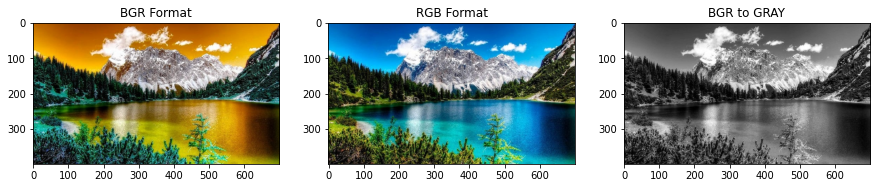

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

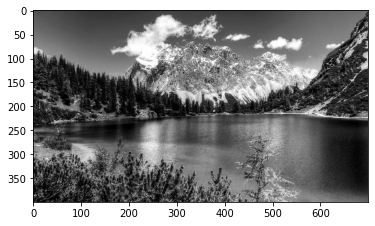

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

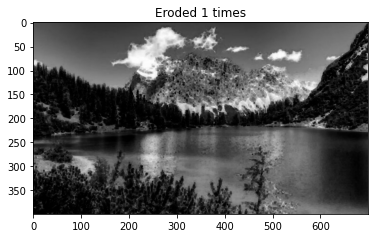

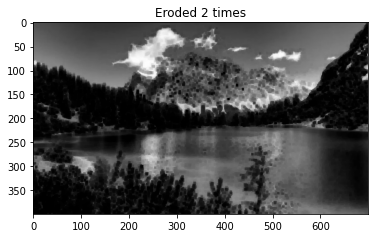

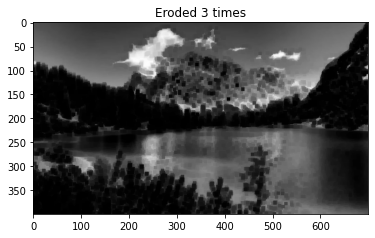

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

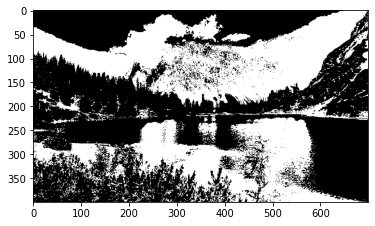

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

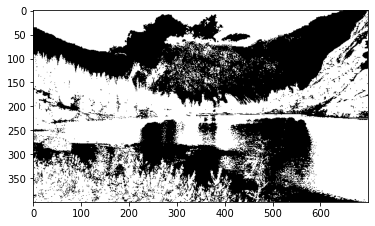

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


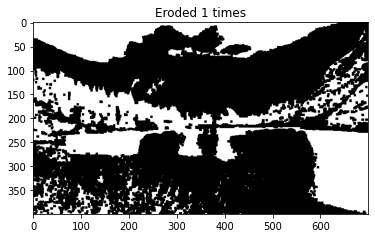

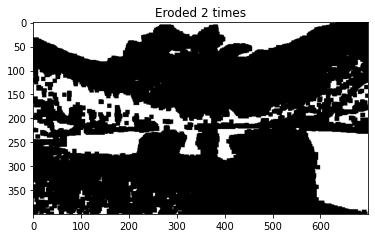

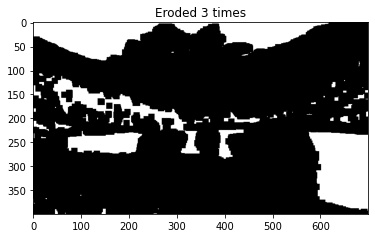

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

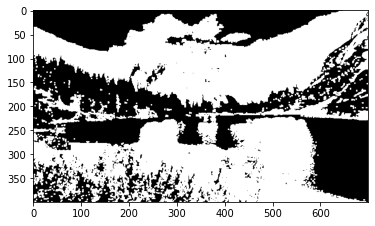

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


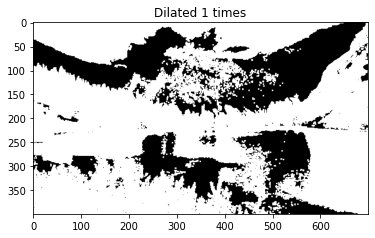

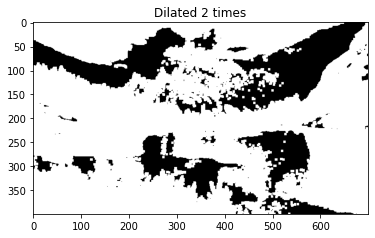

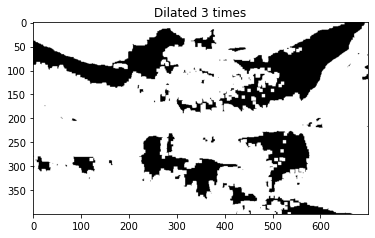

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

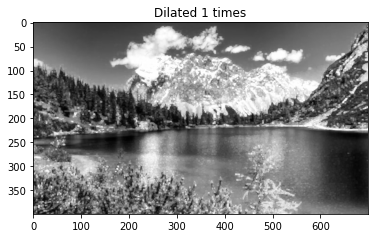

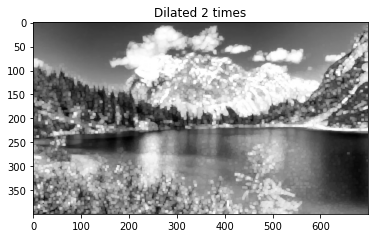

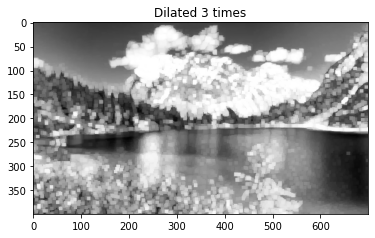

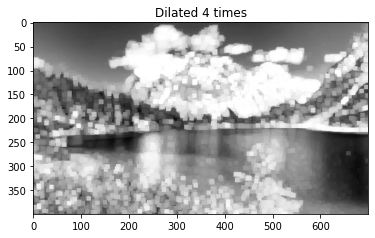

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


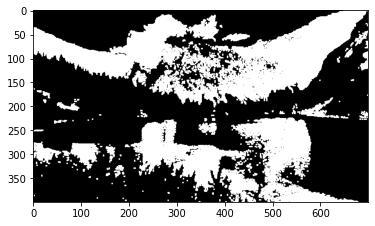

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

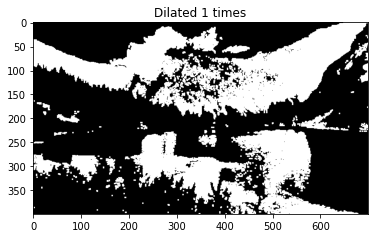

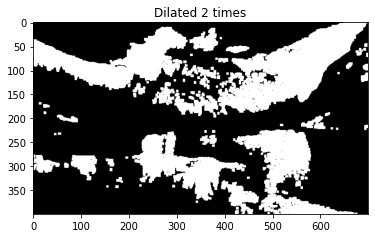

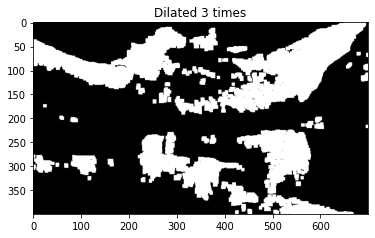

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

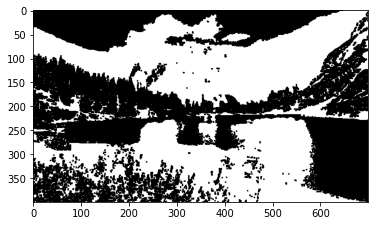

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

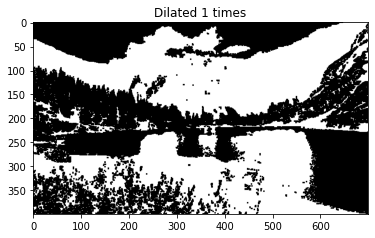

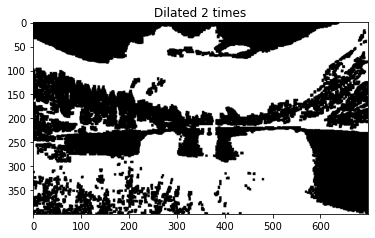

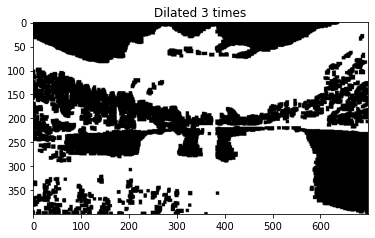

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

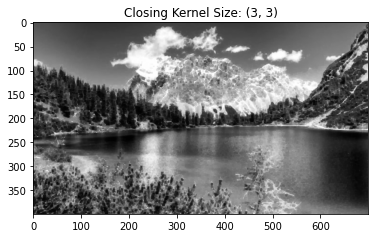

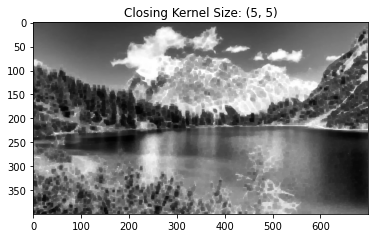

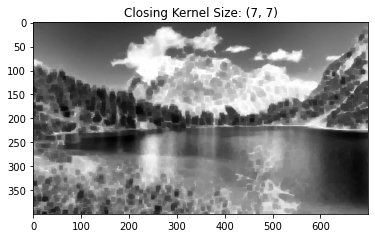

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

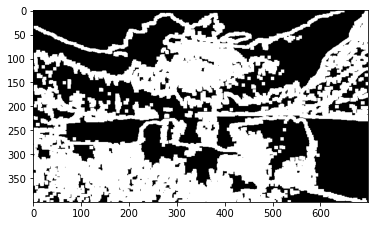

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)
 
#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

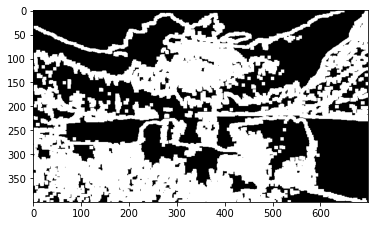

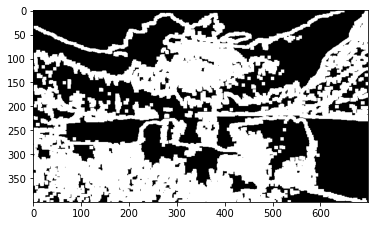

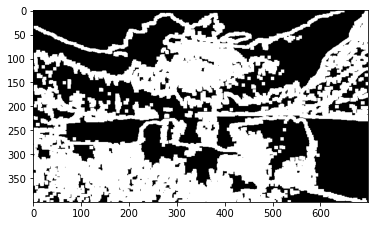

In [ ]:
for i in range(0,3): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

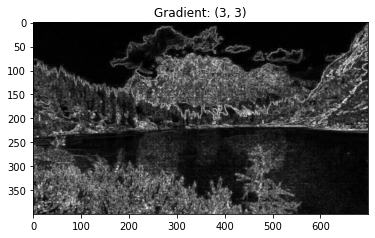

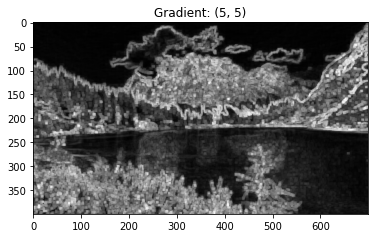

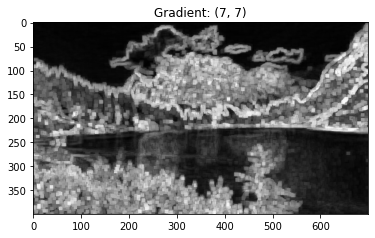

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

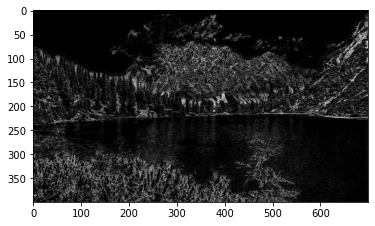

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


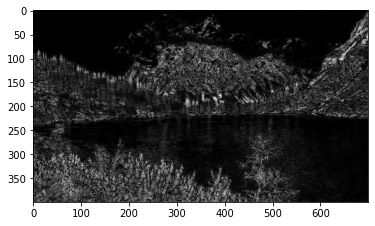

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

# Ejercicios

In [1]:
# importing libraries
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import requests

## Utilitary code

In [2]:
def createKernel(size)-> np.array: 
  return np.ones((size, size), dtype = np.uint8) 

In [31]:
def plot(originalImg: np.array, backAndWhite: np.array, modifiedImage: np.array):
  """
    Display the given images side by side

    Parameters
      ----------
      originalImg (np.array): the original image represented as a numpy array
      backAndWhite (np.array): the back and white version of the original image
      modifiedImage (np.array): erosed/diluted version of the orginal mage
  """
  _, ax = plt.subplots(1, 3, figsize=(12, 6))
  ax[0].imshow(originalImg, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')
  ax[1].imshow(backAndWhite, cmap='gray');
  ax[1].set_title('Back and white')
  ax[1].axis('off')
  ax[2].imshow(modifiedImage, cmap='gray');
  ax[2].set_title('Morphological operation')
  ax[2].axis('off')
  

In [32]:
def getImageByUrl(url: str) -> np.array:
  if url == None:
      raise ValueError('url is required and cannot be None')
  response = requests.get(url);
  img = Image.open(BytesIO(response.content))
  return img

In [33]:
def convolution(image: np.array, kernel: np.array, fit: callable) -> np.array:
  """
    peform a convolution operation image * kernel

    Parameters
      image (np.array): Image represented as a numpy array
      kernel (np.array): NxN Kernel used to perform the convolution operation (aka Filter)
      fit (callable): function that will perform the element wise multiplication
    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """
  # getting the reflexion of the given kernel
  # kernel = np.flipud(np.fliplr(kernel))
  
  # computing padding factor by floor-dividing the kernel by 2
  paddingFactor = kernel.shape[0] // 2

  # padding image with 0s
  padded_image = np.pad(image, (paddingFactor, paddingFactor))

  # creating output np.array
  output = np.zeros_like(image, dtype=np.uint8)
  

  # deriving offset based kernel shape
  xOffset = kernel.shape[0]
  yOffset = kernel.shape[1]

  # applying kernel (filter) to the given image
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      output[x, y] = fit(padded_image[x: x + xOffset, y: y + yOffset], kernel)
  return output

In [34]:
# Define target image url
TARGET_IMAGE_URL = 'https://raw.githubusercontent.com/jorgetapia-ml/Actividades-Visualizacion-eq17/develop/images/chess.jpeg'

In [35]:
# get images
targetImage = getImageByUrl(TARGET_IMAGE_URL)

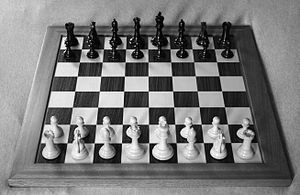

In [36]:
# display image as graysapce
grayScaledTargetImage = targetImage.convert('L')
# display image
grayScaledTargetImage

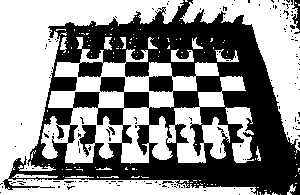

In [37]:
# convert the image to black and white mode with dither set to None
bwTargetImage = targetImage.convert('1', dither=Image.NONE)
# display image
bwTargetImage

In [38]:
# casting image as np.array
bwTargetImageData = np.array(bwTargetImage, dtype = np.uint8)

## Erosión

Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

In [39]:
def erosion(image: np.array, kernel: np.array = None) -> np.array:
  """
    peform the Morphological operation erosition on the given image

    Parameters
      image (np.array): Image represented as a numpy array
      kernel (np.array): NxN Kernel used to perform the convolution operation (aka Filter)
      fit (callable): function that will perform the element wise multiplication
    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """

  # if no kernel provided
  # then default it to a 3x3 np.array
  if kernel is None:
    kernel = createKernel(3)

  # define erosion fit 
  def fit(A: np.array, B: np.array) -> int:
    """
      Checks if B fits in A (all elements).
      Algorithm is defined in https://wjarr.com/sites/default/files/WJARR-2022-0576.pdf section 4.1 Erosion

      Parameters
        A (np.array): Image represented as a numpy array
        B (np.array): NxN Kernel used to perform the convolution operation (aka Filter)
      Returns
        int: 1 if B fits in A, otherwise 0
    """

    for x in range(A.shape[0]):
      for y in range(A.shape[1]):
        if A[x,y] != B[x, y] and B[x, y] != 0:
          return 0
    return 1

  # perform convolution using erosion fit
  return convolution(image, kernel, fit)

In [40]:
# apply erosion morphological operation
erosedTargetImage = erosion(bwTargetImageData)

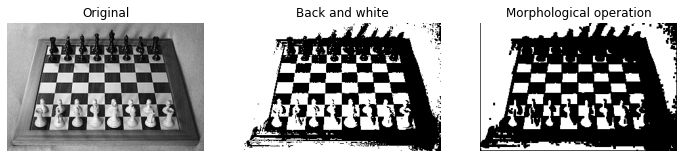

In [41]:
plot(grayScaledTargetImage, bwTargetImage, erosedTargetImage)

## 2 Dilatación

Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

In [42]:
def dilation(image: np.array, kernel: np.array = None) -> np.array:
  """
    peform the Morphological operation dilation on the given image

    Parameters
      image (np.array): Image represented as a numpy array
      kernel (np.array): NxN Kernel used to perform the convolution operation (aka Filter)
      fit (callable): function that will perform the element wise multiplication
    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """

  # if no kernel provided
  # then default it to a 3x3 np.array
  if kernel is None:
    kernel = createKernel(3)

  # define dilution fit 
  def fit(A: np.array, B: np.array) -> int:
    """
      Checks if B fits in A (at least one element).
      Algorithm is defined in https://wjarr.com/sites/default/files/WJARR-2022-0576.pdf section 4.2 Dilation

      Parameters
        A (np.array): Image represented as a numpy array
        B (np.array): NxN Kernel used to perform the convolution operation (aka Filter)
      Returns
        int: 1 if B fits in A, otherwise 0
    """
    for x in range(A.shape[0]):
      for y in range(A.shape[1]):
        if A[x,y] == B[x, y] and B[x, y] != 0:
          return 1
    return 0

  # perform convolution using dilution fit
  return convolution(image, kernel, fit)

In [43]:
# apply dilation morphological operation
dilatedTargetImage = dilation(bwTargetImageData)

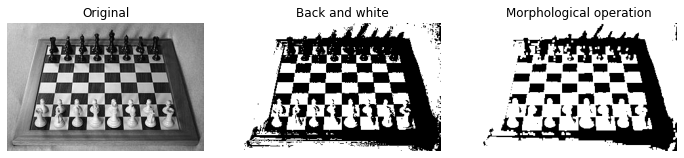

In [44]:
plot(grayScaledTargetImage, bwTargetImage, dilatedTargetImage)

En  **Borra, Subba Reddy & Reddy, Jagadeeswar & Reddy, Edara. (2017)** se hace un preprocesamiento de las imagenes que consiste en aplicar operaciones morfologicas para poder limpiar imagenes de huellas digitales y mejorar el proceso de clasificación. 


La metodología propuesta en el paper se puede simplifica en tres módulos. Para empezar, la imagen de la huella dactilar se somete a un proceso de eliminación de ruido en el que se utiliza Wave Atom Transform. Cuando finaliza este procedimiento, se realiza la mejora de la imagen para mejorar la tasa de clasificación. La operación morfológica se utiliza en nuestro método propuesto para mejorar la calidad de la imagen. Los operadores morfológicos como dilatación y apertura de área se utilizan aquí para mejorar. La última etapa del método propuesto es la clasificación de la imagen de huellas dactilares. Aquí hemos utilizado el sistema neural genético adaptativo (AGNN) para la clasificación de huellas dactilares.

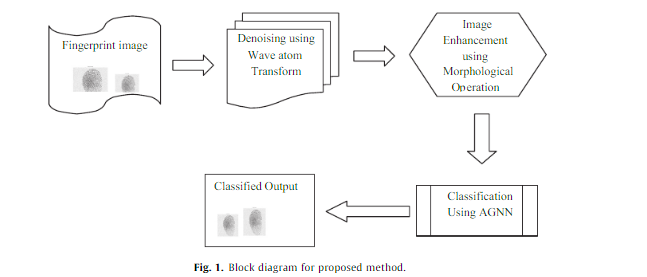

In [74]:
imgs = ["https://i.postimg.cc/632PJtq5/101-1.png", "https://i.postimg.cc/wMDbM2DC/101-2.png", "https://i.postimg.cc/9X9kLmsL/101-3.png", "https://i.postimg.cc/QxrywL3h/101-4.png",]

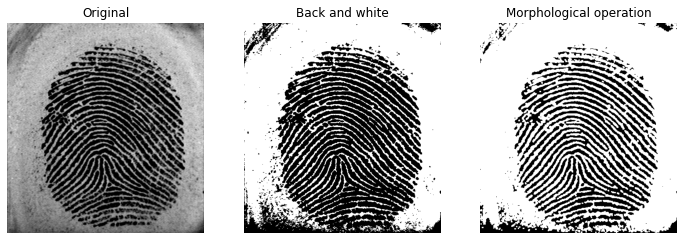

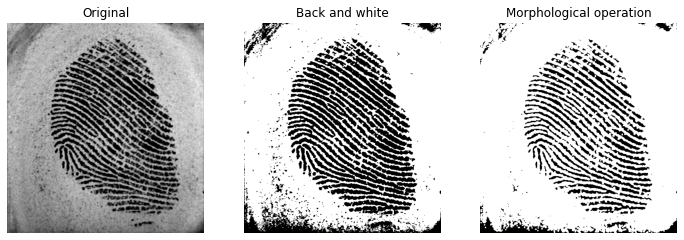

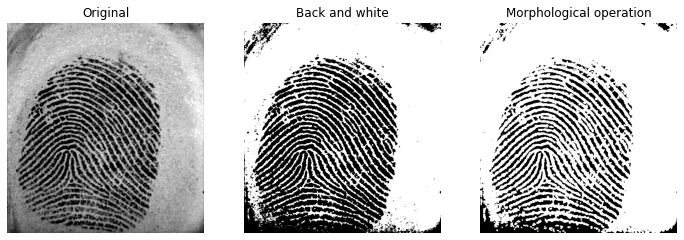

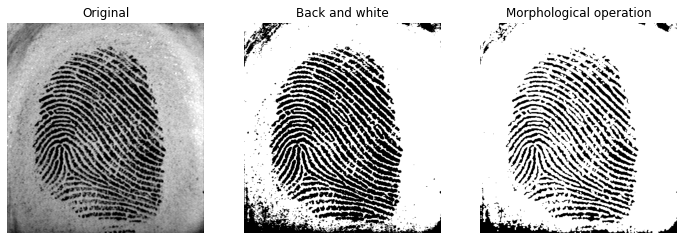

In [75]:
for img in imgs:
  img_loaded = (getImageByUrl(img))
  img_loaded_array_bin = np.array(img_loaded.convert('1', dither=Image.NONE))
  img_dilated = dilation(img_loaded_array_bin)
  plot(np.array(img_loaded), img_loaded_array_bin, img_dilated)

## Opening and closing

Investigar una aplicación de opening y closing e implementalo en Google Colab

In [45]:
def opening(image: np.array, kernelSize: int = 3):
  """
    peform the Morphological operation opening on the given image
    Operation is defined in https://wjarr.com/sites/default/files/WJARR-2022-0576.pdf section 5.1 Opening
    Opening = (A Θ B) ⊕ B
    
    Parameters
      image (np.array): Image represented as a numpy array
      kernelSize (int): NxN Kernel used to perform the convolution operation (aka Filter)
    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """
  # define shared kernel
  kernel = createKernel(kernelSize)
  # perform erosion
  erosedImage = erosion(image, kernel)
  # perform dilation on the erosed image
  return dilation(erosedImage, kernel)

In [46]:
# apply opening morphological operation
openedImage = opening(bwTargetImageData)

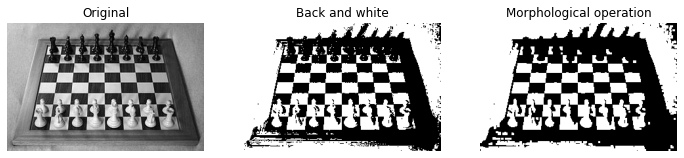

In [47]:
plot(grayScaledTargetImage, bwTargetImage, openedImage)

In [48]:
def closing(image: np.array, kernelSize: int = 3):
  """
    peform the Morphological operation closing on the given image
    Operation is defined in https://wjarr.com/sites/default/files/WJARR-2022-0576.pdf section 5.2 Closing
    Opening = (A ⊕ B) Θ B

    Parameters
      image (np.array): Image represented as a numpy array
      kernelSize (int): NxN Kernel used to perform the convolution operation (aka Filter)
    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """
  # define shared kernel
  kernel = createKernel(kernelSize)
  # perform dilation
  dilatedImage = dilation(image, kernel)
  # perform erosion on the dilated image
  return erosion(dilatedImage, kernel)

In [49]:
# apply opening morphological operation
closedImage = closing(bwTargetImageData)

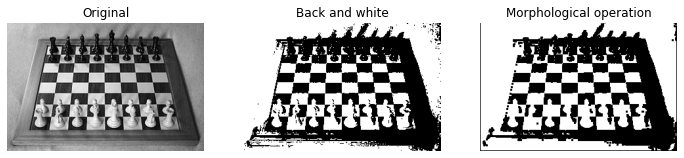

In [50]:
plot(grayScaledTargetImage, bwTargetImage, closedImage)

# Referencias
Borra, Subba Reddy & Reddy, Jagadeeswar & Reddy, Edara. (2017). Classification of Fingerprint Images with the aid of Morphological Operation and AGNN Classifier. Applied Computing and Informatics. 14. 10.1016/j.aci.2017.07.001